In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [14]:
df=pd.read_csv('Student_Marks.csv')
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


<h1>1) split data to train and test</h1>

In [16]:
from sklearn.model_selection import train_test_split

train ,test =train_test_split(df,test_size=0.20,random_state=0)


<h1>2) split train to fetures and target  </h1>

In [17]:
x=train.iloc[:,:2]
y=train.iloc[:,2]


<h1>3) Fit data</h1>

In [18]:
reg =LinearRegression()
reg.fit(x,y)


LinearRegression()

<h1>4) Score , coef ,intercept<h1>

In [19]:
print(reg.coef_)
print(reg.intercept_)
print(reg.score(x,y))

[1.81180449 5.39453433]
-6.887034877371768
0.9403650041455023


<h1>5) Sort test train to compare in graph</h1>

In [20]:
print(test.head())
test.sort_index(inplace=True)
print(test.head())


    number_courses  time_study   Marks
26               7       0.508  12.647
86               7       4.067  23.149
2                4       3.133  13.811
55               7       2.913  18.238
75               3       0.803   6.217
    number_courses  time_study   Marks
2                4       3.133  13.811
7                5       3.413  17.264
8                4       4.410  20.348
13               3       4.274  17.672
16               5       5.719  30.548


<h1>6) Make prediction</h2>

In [21]:
test_predict=reg.predict(test.iloc[:,:2])
print(test_predict.round(2))
print()
print(test['Marks'].values.round(2))

[17.26 20.58 24.15 21.6  33.02 13.24 19.97  8.54 28.45 39.56 38.43 48.56
 21.51  7.34  2.88 45.99 27.74 27.48 42.52 23.19]

[13.81 17.26 20.35 17.67 30.55 12.21 16.52 12.65 24.17 39.97 36.65 53.16
 18.24  7.01  6.22 49.54 23.15 23.92 42.43 19.13]


<h1>7) Ghraph</h1>

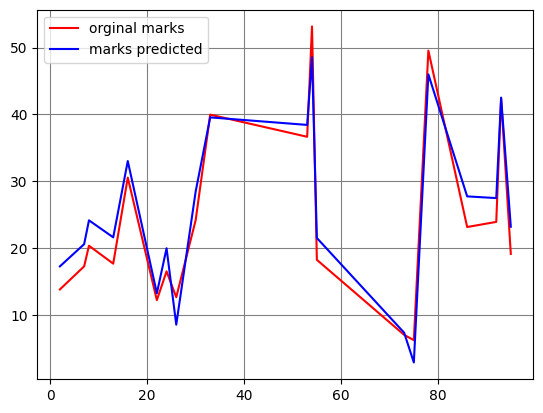

In [22]:
plt.plot(test.index,test['Marks'],label='orginal marks',color='red')
plt.plot(test.index,test_predict,color='blue',label='marks predicted')
plt.legend()
plt.grid(visible=True,color='gray')
plt.show()